## Pima Indians - diabetes prediction
## Neural Network for binary classification using Dropout
Sample Model


In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.models import model_from_json
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]               # These columns are Number of times pregnant, Plasma glucose concentration, diastolic blood pressure, 
                                 # triceps skin fold thickness, 2-hour serum insulin, body mass index, diabetes pedigree function, Age
Y = dataset[:,8]                 # Indicates whether or not the individual developed diabetes in five years (yes/no indicated by 1/0)

# create model 
model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.5,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 50% on the input level -
                                                                                # so half of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with default learning rate
history=model.fit(X,Y,validation_split=0.333,epochs=1000,verbose=0)                # 33% of the data will be test/validation data; 67% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the model accuracy as a percentage

# Save model to disk
# Save model structure as json
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# I have included this code for you which will create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Using TensorFlow backend.


768/768 [==============================] - 0s 23us/step

acc: 66.54%
Saved model to disk
Confusion Matrix
True negatives:  497
False negatives:  254
False positives:  3
True positives:  14


Sample model graph of training and testing loss accuracy.

In [2]:
# import necessary graphing library
import matplotlib.pyplot as plt

# Assign training and testing accuracy and losses to variables so they can be graphed
accuracy_training = history.history['acc']
accuracy_testing = history.history['val_acc']

loss_training = history.history['loss']
loss_testing = history.history['val_loss']


# Graphy the data
plt.subplot(2,1,1)
plt.plot(loss_training,label='Training')
plt.plot(loss_testing, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 50% Dropout/33% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy_training,label='Training', color = 'green')
plt.plot(accuracy_testing,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 50% Dropout/33% Test Data")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 2 Axes>

# Run the model 3 times - each with a different dropout rate - and graph the accuracy and loss convergence of the model and the accuracy and convergence of the training and testing data with 3 different training/test splits.

In [3]:
# Create model with 10% input dropout rate and 10% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.1,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 10% on the input level -
                                                                                # so 10% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.10,epochs=1000,verbose=0)                 # 10% of the data will be test/validation data; 90% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy10_training10 = history.history['acc']
accuracy10_testing10 = history.history['val_acc']

loss10_training10 = history.history['loss']
loss10_testing10 = history.history['val_loss']

768/768 [==============================] - 0s 27us/step

acc: 70.83%
Confusion Matrix
True negatives:  494
False negatives:  218
False positives:  6
True positives:  50


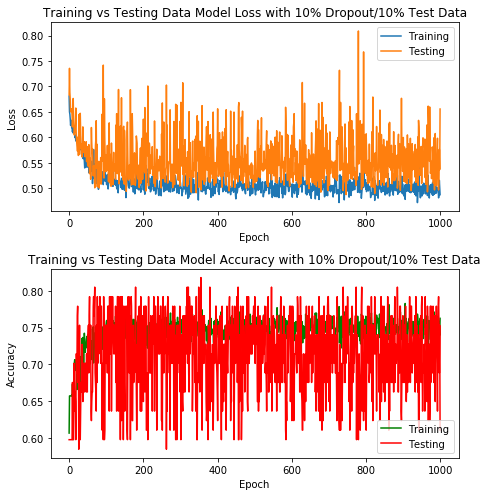

In [4]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss10_training10,label='Training')
plt.plot(loss10_testing10, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 10% Dropout/10% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy10_training10,label='Training', color = 'green')
plt.plot(accuracy10_testing10,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/10% Test Data")
plt.tight_layout()
plt.show()

In [5]:
# Create model with 10% input dropout rate and 20% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.1,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 10% on the input level -
                                                                                # so 10% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.20,epochs=1000,verbose=0)                 # 20% of the data will be test/validation data; 80% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy10_training20 = history.history['acc']
accuracy10_testing20 = history.history['val_acc']

loss10_training20 = history.history['loss']
loss10_testing20 = history.history['val_loss']

768/768 [==============================] - 0s 32us/step

acc: 76.82%
Confusion Matrix
True negatives:  437
False negatives:  115
False positives:  63
True positives:  153


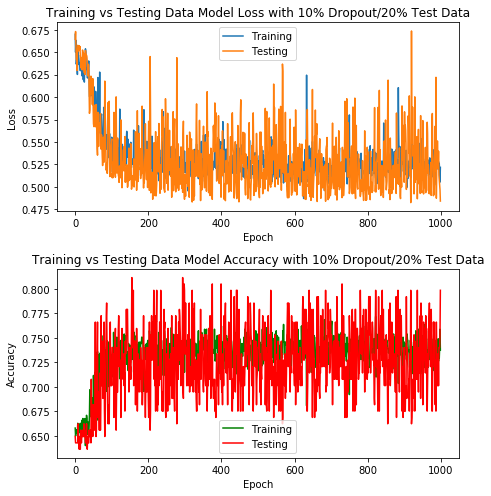

In [6]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss10_training20,label='Training')
plt.plot(loss10_testing20, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 10% Dropout/20% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy10_training20,label='Training', color = 'green')
plt.plot(accuracy10_testing20,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/20% Test Data")
plt.tight_layout()
plt.show()

In [7]:
# Create model with 10% input dropout rate and 30% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.1,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 10% on the input level -
                                                                                # so 10% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.30,epochs=1000,verbose=0)                 # 30% of the data will be test/validation data; 70% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy10_training30 = history.history['acc']
accuracy10_testing30 = history.history['val_acc']

loss10_training30 = history.history['loss']
loss10_testing30 = history.history['val_loss']

768/768 [==============================] - 0s 32us/step

acc: 70.31%
Confusion Matrix
True negatives:  483
False negatives:  211
False positives:  17
True positives:  57


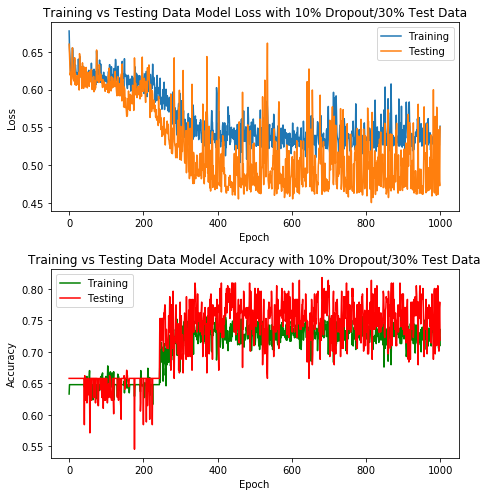

In [8]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss10_training30,label='Training')
plt.plot(loss10_testing30, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 10% Dropout/30% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy10_training30,label='Training', color = 'green')
plt.plot(accuracy10_testing30,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/30% Test Data")
plt.tight_layout()
plt.show()

In [9]:
# Create model with 20% input dropout rate and 10% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.2,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 20% on the input level -
                                                                                # so 20% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.10,epochs=1000,verbose=0)                 # 10% of the data will be test/validation data; 90% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy20_training10 = history.history['acc']
accuracy20_testing10 = history.history['val_acc']

loss20_training10 = history.history['loss']
loss20_testing10 = history.history['val_loss']

768/768 [==============================] - 0s 23us/step

acc: 71.74%
Confusion Matrix
True negatives:  489
False negatives:  206
False positives:  11
True positives:  62


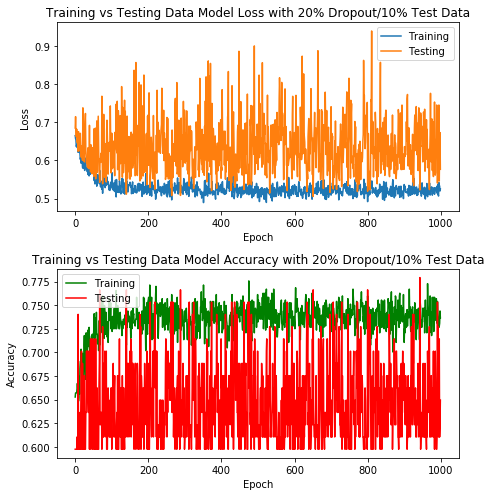

In [10]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss20_training10,label='Training')
plt.plot(loss20_testing10, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 20% Dropout/10% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy20_training10,label='Training', color = 'green')
plt.plot(accuracy20_testing10,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/10% Test Data")
plt.tight_layout()
plt.show()

In [11]:
# Create model with 20% input dropout rate and 20% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.2,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 20% on the input level -
                                                                                # so 20% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.20,epochs=1000,verbose=0)                 # 20% of the data will be test/validation data; 80% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy20_training20 = history.history['acc']
accuracy20_testing20 = history.history['val_acc']

loss20_training20 = history.history['loss']
loss20_testing20 = history.history['val_loss']

768/768 [==============================] - 0s 37us/step

acc: 67.97%
Confusion Matrix
True negatives:  498
False negatives:  244
False positives:  2
True positives:  24


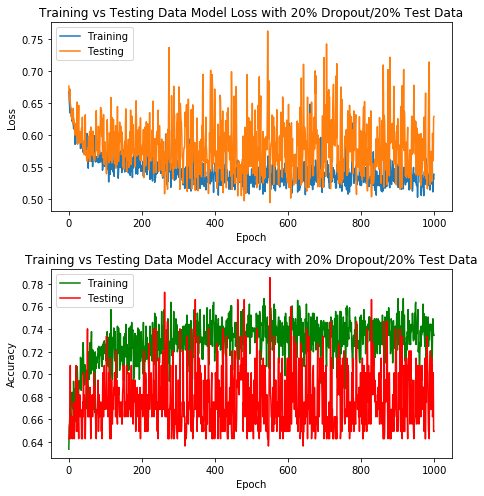

In [12]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss20_training20,label='Training')
plt.plot(loss20_testing20, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 20% Dropout/20% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy20_training20,label='Training', color = 'green')
plt.plot(accuracy20_testing20,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/20% Test Data")
plt.tight_layout()
plt.show()

In [13]:
# Create model with 20% input dropout rate and 30% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.2,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 20% on the input level -
                                                                                # so 20% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.30,epochs=1000,verbose=0)                 # 30% of the data will be test/validation data; 70% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy20_training30 = history.history['acc']
accuracy20_testing30 = history.history['val_acc']

loss20_training30 = history.history['loss']
loss20_testing30 = history.history['val_loss']

768/768 [==============================] - 0s 18us/step

acc: 71.88%
Confusion Matrix
True negatives:  487
False negatives:  203
False positives:  13
True positives:  65


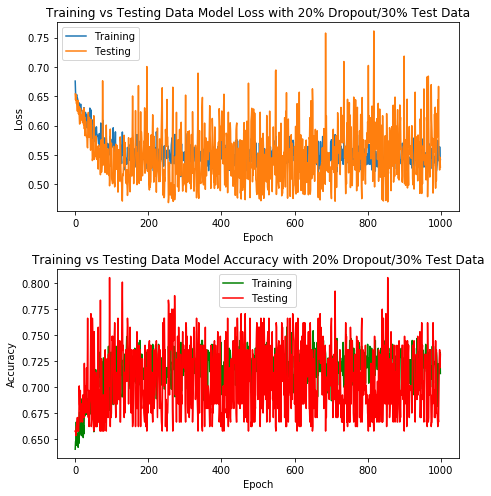

In [14]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss20_training30,label='Training')
plt.plot(loss20_testing30, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 20% Dropout/30% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy20_training30,label='Training', color = 'green')
plt.plot(accuracy20_testing30,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/30% Test Data")
plt.tight_layout()
plt.show()

In [15]:
# Create model with 30% input dropout rate and 10% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.3,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 30% on the input level -
                                                                                # so 30% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.10,epochs=1000,verbose=0)                 # 10% of the data will be test/validation data; 90% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy30_training10 = history.history['acc']
accuracy30_testing10 = history.history['val_acc']

loss30_training10 = history.history['loss']
loss30_testing10 = history.history['val_loss']

768/768 [==============================] - 0s 55us/step

acc: 67.19%
Confusion Matrix
True negatives:  495
False negatives:  247
False positives:  5
True positives:  21


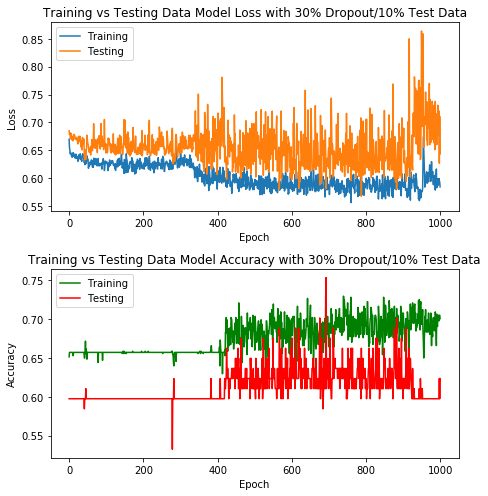

In [16]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss30_training10,label='Training')
plt.plot(loss30_testing10, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 30% Dropout/10% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy30_training10,label='Training', color = 'green')
plt.plot(accuracy30_testing10,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/10% Test Data")
plt.tight_layout()
plt.show()

In [17]:
# Create model with 30% input dropout rate and 20% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.3,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 30% on the input level -
                                                                                # so 30% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.20,epochs=1000,verbose=0)                 # 20% of the data will be test/validation data; 80% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy30_training20 = history.history['acc']
accuracy30_testing20 = history.history['val_acc']

loss30_training20 = history.history['loss']
loss30_testing20 = history.history['val_loss']

768/768 [==============================] - 0s 19us/step

acc: 65.10%
Confusion Matrix
True negatives:  499
False negatives:  267
False positives:  1
True positives:  1


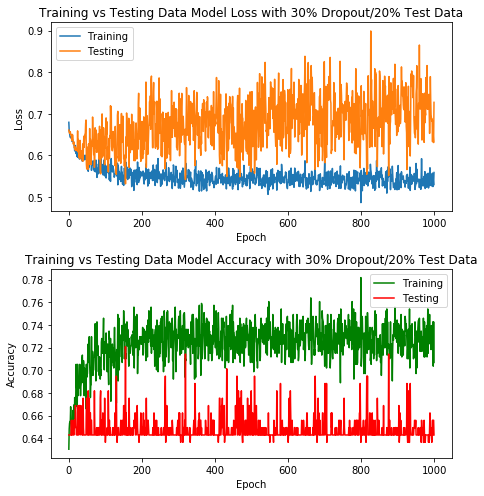

In [18]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss30_training20,label='Training')
plt.plot(loss30_testing20, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 30% Dropout/20% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy30_training20,label='Training', color = 'green')
plt.plot(accuracy30_testing20,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/20% Test Data")
plt.tight_layout()
plt.show()

In [19]:
# Create model with 30% input dropout rate and 30% training data

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (with dropout)
model.add(Dropout(0.3,input_shape=(8,)))                                        # Model has 8 inputs; Dropout rate is set at 30% on the input level -
                                                                                # so 30% of the inputs will be randomly excluded from each iteration
                                                                                # Hidden layers do NOT have dropout in this model.
                                                                                # Dropout is only used to train, not to evaluate
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))  
                                                                                # Connects densely (all nodes connect to every node in the next layer)
                                                                                # 10 node hidden layer 2 connected to 8 node input layer (and layer 3); 
                                                                                # set 3 as the largest weight allowed
                                                                                # uses ReLu activation function
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))   
                                                                                # 8 node layer; set 3 as the largest weight allowed; ReLu activation
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))             # 1 target variable

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.30,epochs=1000,verbose=0)                 # 30% of the data will be test/validation data; 70% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy30_training30 = history.history['acc']
accuracy30_testing30 = history.history['val_acc']

loss30_training30 = history.history['loss']
loss30_testing30 = history.history['val_loss']

768/768 [==============================] - 0s 41us/step

acc: 65.62%
Confusion Matrix
True negatives:  499
False negatives:  263
False positives:  1
True positives:  5


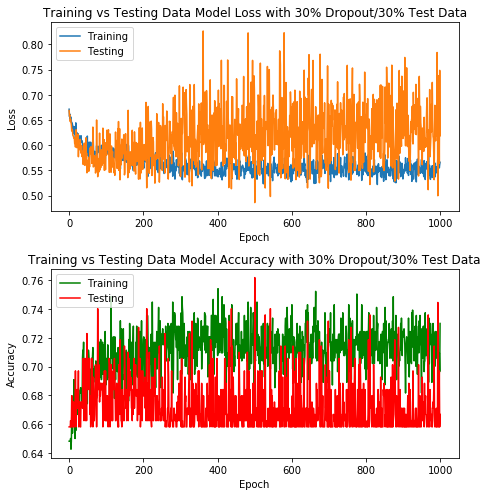

In [20]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss30_training30,label='Training')
plt.plot(loss30_testing30, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with 30% Dropout/30% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy30_training30,label='Training', color = 'green')
plt.plot(accuracy30_testing30,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/30% Test Data")
plt.tight_layout()
plt.show()

In [21]:
# Create model with NO input dropout rate and 10% training data to have as a control to see how the model works without dropout.

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (without dropout) connecting to first layer of 10 nodes, ReLu activation
model.add(Dense(10, input_dim = 8, activation = 'relu'))

model.add(Dense(8, activation='relu'))                                              # 8 node layer; ReLu activation

model.add(Dense(1, activation='sigmoid'))                                          # 1 target variable, Sigmoid activation

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.10,epochs=1000,verbose=0)                 # 10% of the data will be test/validation data; 90% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy0_training10 = history.history['acc']
accuracy0_testing10 = history.history['val_acc']

loss0_training10 = history.history['loss']
loss0_testing10 = history.history['val_loss']

768/768 [==============================] - 0s 36us/step

acc: 77.73%
Confusion Matrix
True negatives:  443
False negatives:  114
False positives:  57
True positives:  154


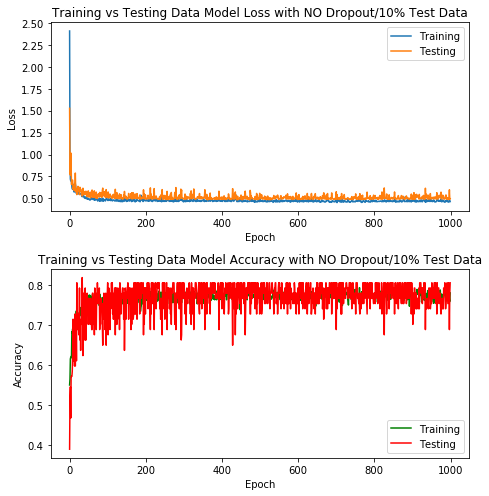

In [22]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss0_training10,label='Training')
plt.plot(loss0_testing10, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with NO Dropout/10% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy0_training10,label='Training', color = 'green')
plt.plot(accuracy0_testing10,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/10% Test Data")
plt.tight_layout()
plt.show()

In [23]:
# Create model with NO input dropout rate and 20% training data to have as a control to see how the model works without dropout.

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (without dropout) connecting to first layer of 10 nodes, ReLu activation
model.add(Dense(10, input_dim = 8, activation = 'relu'))

model.add(Dense(8, activation='relu'))                                              # 8 node layer; ReLu activation

model.add(Dense(1, activation='sigmoid'))                                          # 1 target variable, Sigmoid activation

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.20,epochs=1000,verbose=0)                 # 20% of the data will be test/validation data; 80% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy0_training20 = history.history['acc']
accuracy0_testing20 = history.history['val_acc']

loss0_training20 = history.history['loss']
loss0_testing20 = history.history['val_loss']

768/768 [==============================] - 0s 18us/step

acc: 78.78%
Confusion Matrix
True negatives:  457
False negatives:  120
False positives:  43
True positives:  148


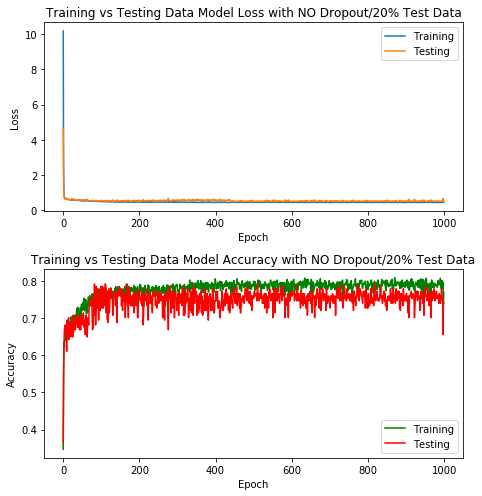

In [24]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss0_training20,label='Training')
plt.plot(loss0_testing20, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with NO Dropout/20% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy0_training20,label='Training', color = 'green')
plt.plot(accuracy0_testing20,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/20% Test Data")
plt.tight_layout()
plt.show()

In [25]:
# Create model with NO input dropout rate and 30% training data to have as a control to see how the model works without dropout.

model = Sequential()             # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
# Input layer (without dropout) connecting to first layer of 10 nodes, ReLu activation
model.add(Dense(10, input_dim = 8, activation = 'relu'))

model.add(Dense(8, activation='relu'))                                              # 8 node layer; ReLu activation

model.add(Dense(1, activation='sigmoid'))                                          # 1 target variable, Sigmoid activation

adam = optimizers.Adam(lr=.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # using binary_crossentropy loss - so target is categorical (0 or 1)
                                                                                   # using adam optimizer with .01 learning rate
history=model.fit(X,Y,validation_split=0.30,epochs=1000,verbose=0)                 # 30% of the data will be test/validation data; 70% is training data
                                                                                   # running 1000 iterations to train and NOT printing iteration results

# Evaluate the model
scores = model.evaluate(X, Y)                    # Save the final loss and final accuracy measurements to a list
Y_predict = model.predict(X)                     # Saves the list of predicted Y values

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))    # Print the accuracy as a percentage

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

accuracy0_training30 = history.history['acc']
accuracy0_testing30 = history.history['val_acc']

loss0_training30 = history.history['loss']
loss0_testing30 = history.history['val_loss']

768/768 [==============================] - 0s 25us/step

acc: 78.39%
Confusion Matrix
True negatives:  455
False negatives:  121
False positives:  45
True positives:  147


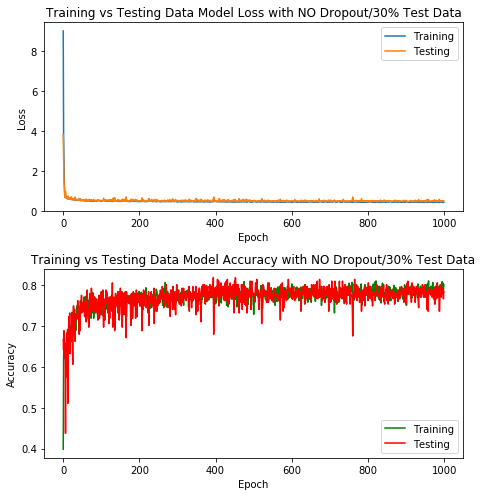

In [26]:
plt.rcParams['figure.figsize'] = (7,7)
plt.subplot(2,1,1)
plt.plot(loss0_training30,label='Training')
plt.plot(loss0_testing30, label = 'Testing')
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Loss with NO Dropout/30% Test Data")

plt.subplot(2,1,2)
plt.plot(accuracy0_training30,label='Training', color = 'green')
plt.plot(accuracy0_testing30,label='Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/30% Test Data")
plt.tight_layout()
plt.show()

# Dropout Model Results on Loss

Text(0.5, 1.0, 'Training vs Testing Data Model Loss with 30% Dropout/30% Test Data')

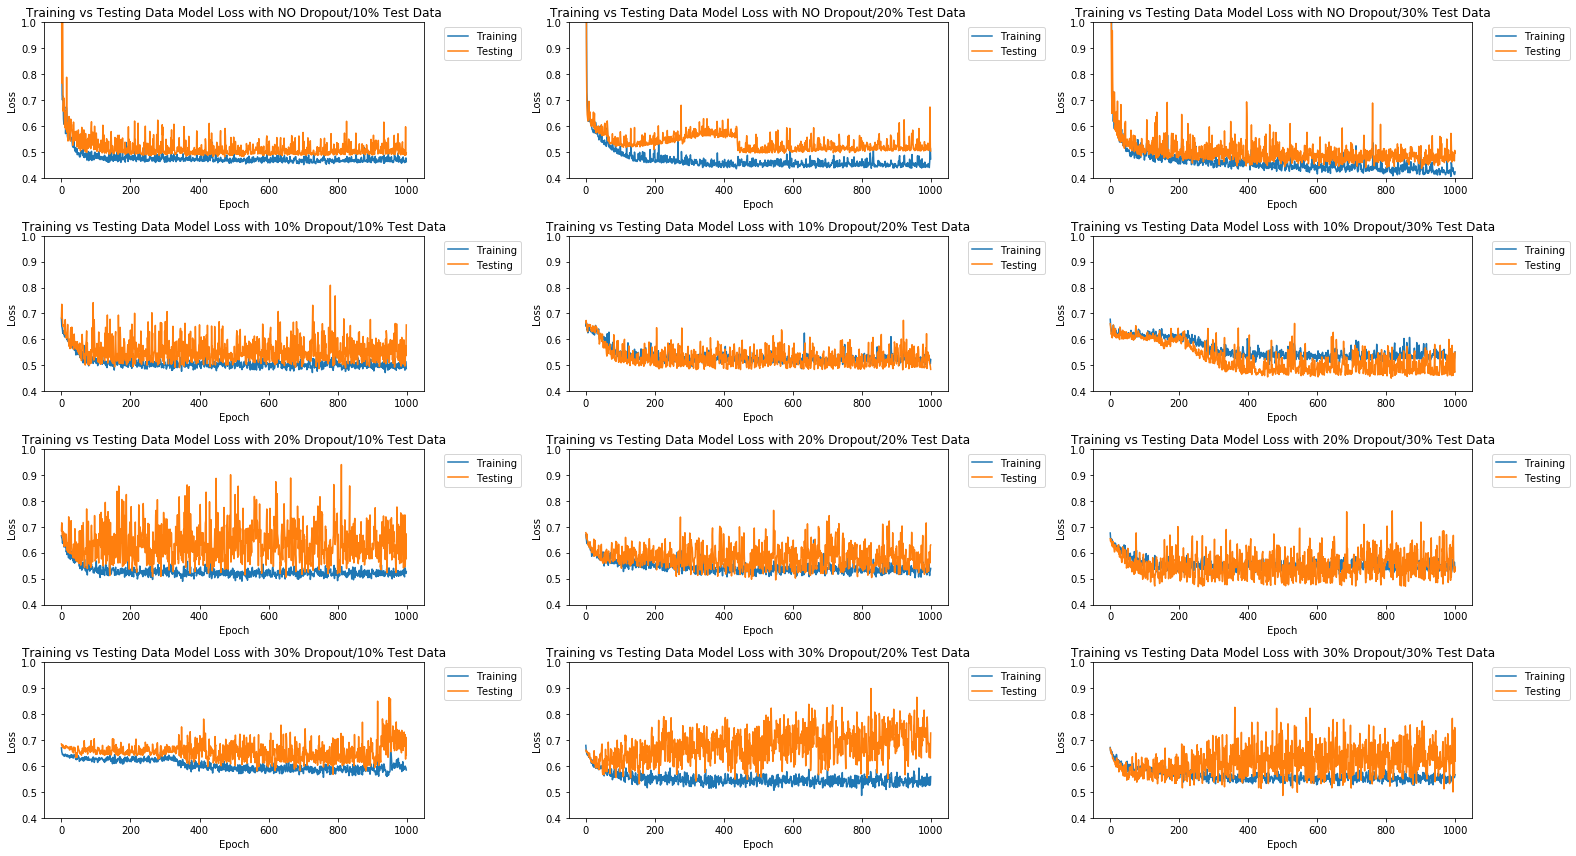

In [31]:
# Loss Graphs at different Sample Sizes and Dropout Rates

plt.rcParams['figure.figsize'] = (22,12)
plt.subplot(4,3,1)
plt.plot(loss0_training10,label='Training')
plt.plot(loss0_testing10, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with NO Dropout/10% Test Data")

plt.subplot(4,3,2)
plt.plot(loss0_training20,label='Training')
plt.plot(loss0_testing20, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with NO Dropout/20% Test Data")

plt.subplot(4,3,3)
plt.plot(loss0_training30,label='Training')
plt.plot(loss0_testing30, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with NO Dropout/30% Test Data")

plt.subplot(4,3,4)
plt.plot(loss10_training10,label='Training')
plt.plot(loss10_testing10, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with 10% Dropout/10% Test Data")

plt.subplot(4,3,5)
plt.plot(loss10_training20,label='Training')
plt.plot(loss10_testing20, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with 10% Dropout/20% Test Data")

plt.subplot(4,3,6)
plt.plot(loss10_training30,label='Training')
plt.plot(loss10_testing30, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Loss with 10% Dropout/30% Test Data")

plt.subplot(4,3,7)
plt.plot(loss20_training10,label='Training')
plt.plot(loss20_testing10, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with 20% Dropout/10% Test Data")

plt.subplot(4,3,8)
plt.plot(loss20_training20,label='Training')
plt.plot(loss20_testing20, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with 20% Dropout/20% Test Data")

plt.subplot(4,3,9)
plt.plot(loss20_training30,label='Training')
plt.plot(loss20_testing30, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Loss with 20% Dropout/30% Test Data")

plt.subplot(4,3,10)
plt.plot(loss30_training10,label='Training')
plt.plot(loss30_testing10, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with 30% Dropout/10% Test Data")

plt.subplot(4,3,11)
plt.plot(loss30_training20,label='Training')
plt.plot(loss30_testing20, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Loss with 30% Dropout/20% Test Data")

plt.subplot(4,3,12)
plt.plot(loss30_training30,label='Training')
plt.plot(loss30_testing30, label = 'Testing')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Loss with 30% Dropout/30% Test Data")

# Dropout Model Results on Accuracy


Text(0.5, 1.0, 'Training vs Testing Data Model Accuracy with 30% Dropout/30% Test Data')

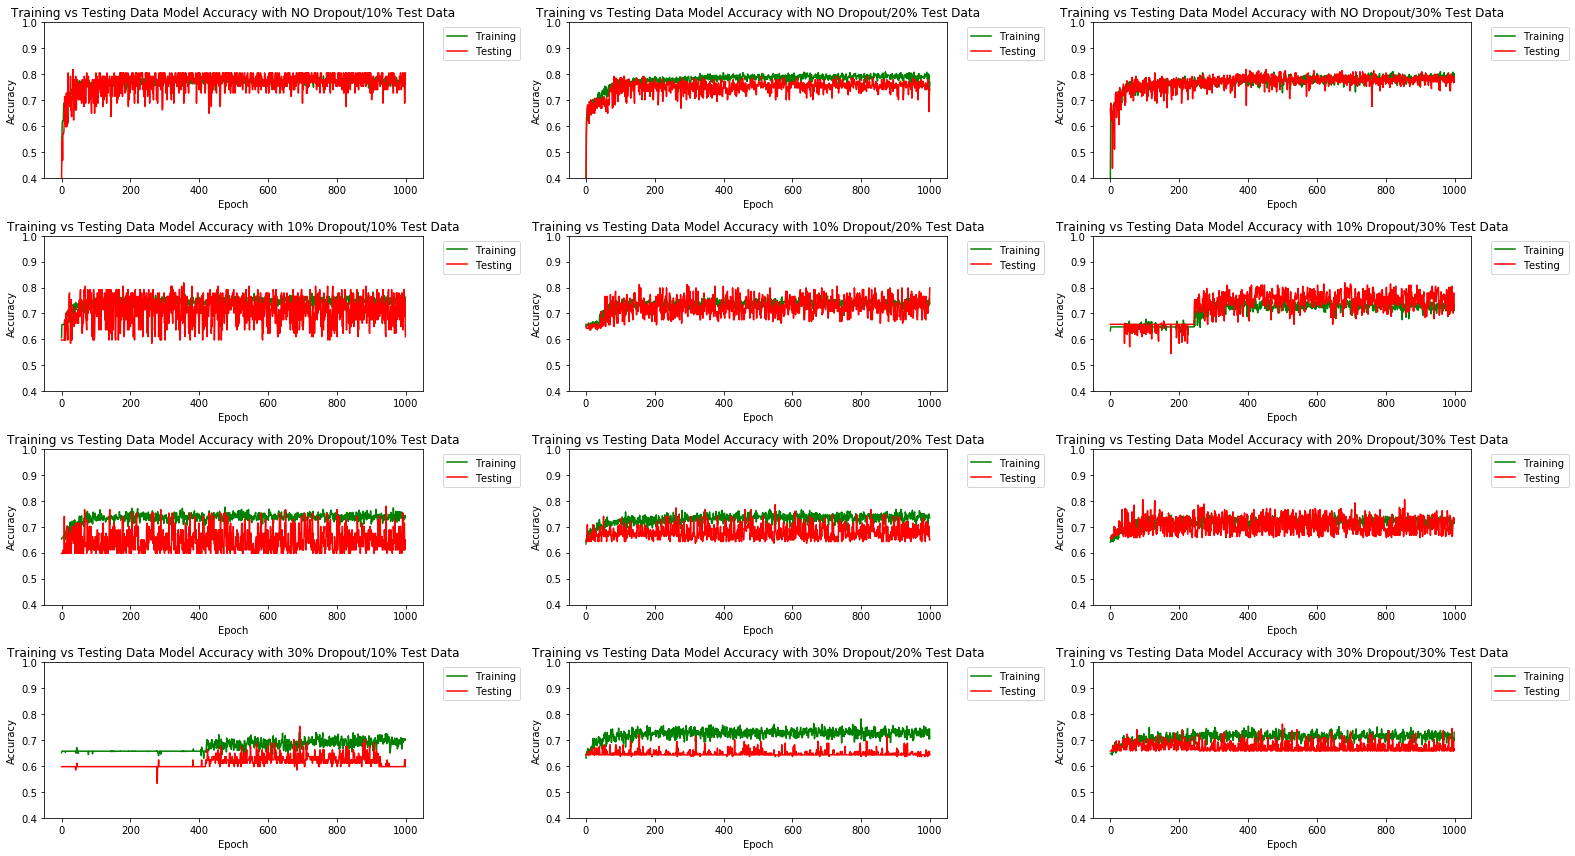

In [30]:
# Accuracy Graphs at different Sample Sizes and Dropout Rates

plt.rcParams['figure.figsize'] = (22,12)
plt.subplot(4,3,1)
plt.plot(accuracy0_training10,label='Training', color = 'green')
plt.plot(accuracy0_testing10, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/10% Test Data")

plt.subplot(4,3,2)
plt.plot(accuracy0_training20,label='Training', color = 'green')
plt.plot(accuracy0_testing20, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/20% Test Data")

plt.subplot(4,3,3)
plt.plot(accuracy0_training30,label='Training', color = 'green')
plt.plot(accuracy0_testing30, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/30% Test Data")

plt.subplot(4,3,4)
plt.plot(accuracy10_training10,label='Training', color = 'green')
plt.plot(accuracy10_testing10, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/10% Test Data")

plt.subplot(4,3,5)
plt.plot(accuracy10_training20,label='Training', color = 'green')
plt.plot(accuracy10_testing20, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/20% Test Data")

plt.subplot(4,3,6)
plt.plot(accuracy10_training30,label='Training', color = 'green')
plt.plot(accuracy10_testing30, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/30% Test Data")

plt.subplot(4,3,7)
plt.plot(accuracy20_training10,label='Training', color = 'green')
plt.plot(accuracy20_testing10, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/10% Test Data")

plt.subplot(4,3,8)
plt.plot(accuracy20_training20,label='Training', color = 'green')
plt.plot(accuracy20_testing20, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/20% Test Data")

plt.subplot(4,3,9)
plt.plot(accuracy20_training30,label='Training', color = 'green')
plt.plot(accuracy20_testing30, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/30% Test Data")

plt.subplot(4,3,10)
plt.plot(accuracy30_training10,label='Training', color = 'green')
plt.plot(accuracy30_testing10, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/10% Test Data")

plt.subplot(4,3,11)
plt.plot(accuracy30_training20,label='Training', color = 'green')
plt.plot(accuracy30_testing20, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/20% Test Data")

plt.subplot(4,3,12)
plt.plot(accuracy30_training30,label='Training', color = 'green')
plt.plot(accuracy30_testing30, label = 'Testing', color = 'red')
plt.ylim([.4,1])
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/30% Test Data")

Text(0.5, 1.0, 'Training vs Testing Data Model Accuracy with 30% Dropout/30% Test Data')

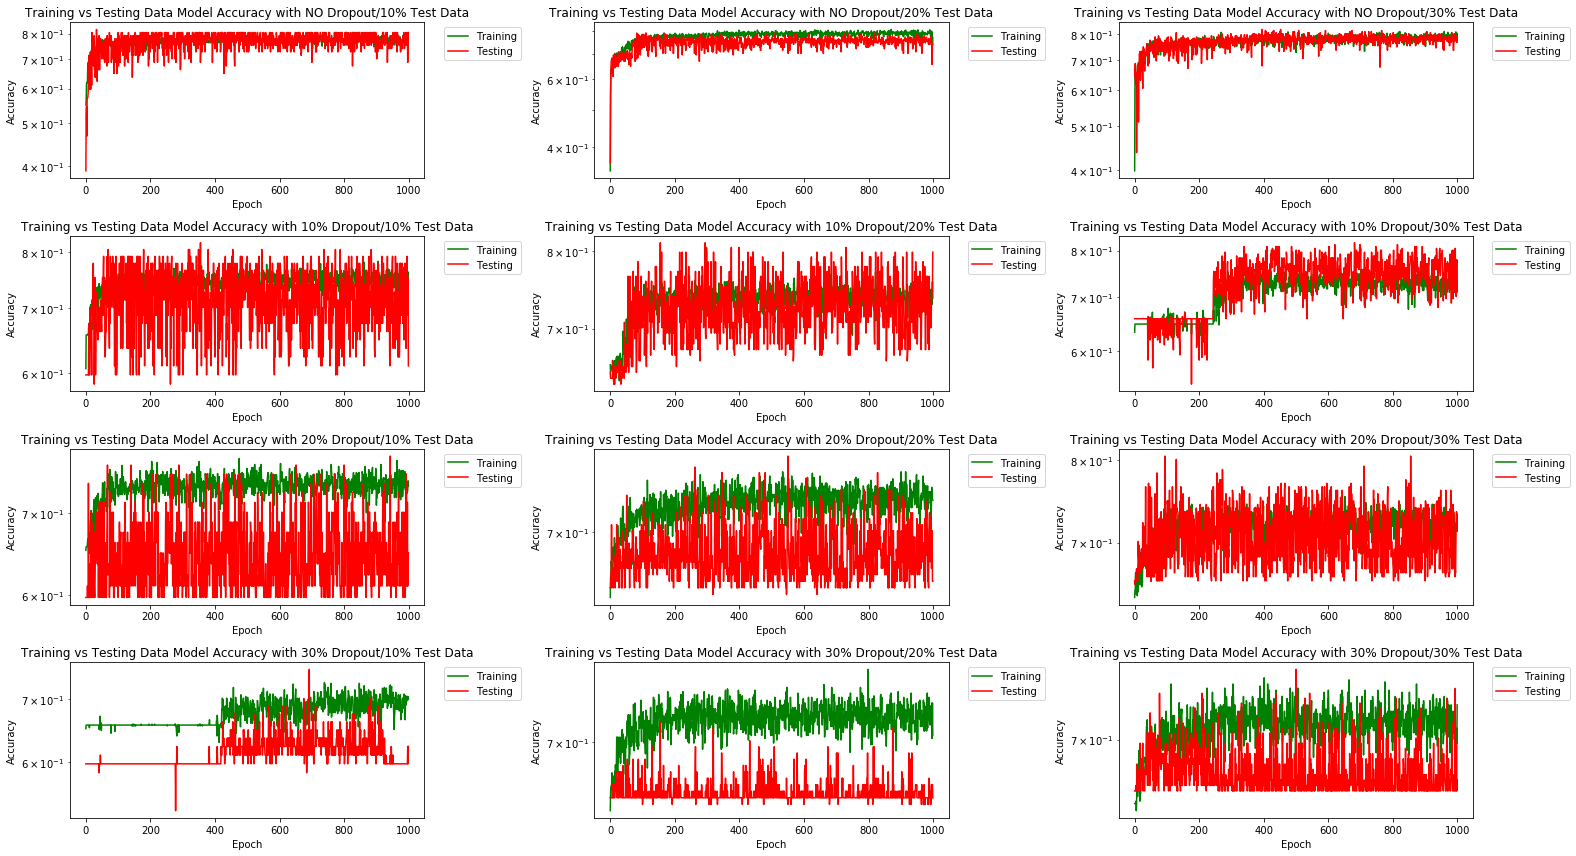

In [29]:
# Accuracy Graphs at different Sample Sizes and Dropout Rates on log scale to beter visualize the accuracy

plt.rcParams['figure.figsize'] = (22,12)
plt.subplot(4,3,1)
plt.semilogy(accuracy0_training10,label='Training', color = 'green')
plt.semilogy(accuracy0_testing10, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/10% Test Data")

plt.subplot(4,3,2)
plt.semilogy(accuracy0_training20,label='Training', color = 'green')
plt.semilogy(accuracy0_testing20, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/20% Test Data")

plt.subplot(4,3,3)
plt.semilogy(accuracy0_training30,label='Training', color = 'green')
plt.semilogy(accuracy0_testing30, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with NO Dropout/30% Test Data")

plt.subplot(4,3,4)
plt.semilogy(accuracy10_training10,label='Training', color = 'green')
plt.semilogy(accuracy10_testing10, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/10% Test Data")

plt.subplot(4,3,5)
plt.semilogy(accuracy10_training20,label='Training', color = 'green')
plt.semilogy(accuracy10_testing20, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/20% Test Data")

plt.subplot(4,3,6)
plt.semilogy(accuracy10_training30,label='Training', color = 'green')
plt.semilogy(accuracy10_testing30, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Accuracy with 10% Dropout/30% Test Data")

plt.subplot(4,3,7)
plt.semilogy(accuracy20_training10,label='Training', color = 'green')
plt.semilogy(accuracy20_testing10, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/10% Test Data")

plt.subplot(4,3,8)
plt.semilogy(accuracy20_training20,label='Training', color = 'green')
plt.semilogy(accuracy20_testing20, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/20% Test Data")

plt.subplot(4,3,9)
plt.semilogy(accuracy20_training30,label='Training', color = 'green')
plt.semilogy(accuracy20_testing30, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Accuracy with 20% Dropout/30% Test Data")

plt.subplot(4,3,10)
plt.semilogy(accuracy30_training10,label='Training', color = 'green')
plt.semilogy(accuracy30_testing10, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/10% Test Data")

plt.subplot(4,3,11)
plt.semilogy(accuracy30_training20,label='Training', color = 'green')
plt.semilogy(accuracy30_testing20, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/20% Test Data")

plt.subplot(4,3,12)
plt.semilogy(accuracy30_training30,label='Training', color = 'green')
plt.semilogy(accuracy30_testing30, label = 'Testing', color = 'red')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.tight_layout()
plt.title("Training vs Testing Data Model Accuracy with 30% Dropout/30% Test Data")